In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

pensCheckouts = pd.read_sql('SELECT * FROM PensCheckouts', con=db_connection)
pensCheckouts['start'] = pd.to_datetime(pensCheckouts['start'], unit='s')
pensCheckouts['start'].replace(0, np.nan, inplace=True)
pensCheckouts['end'].replace(0, np.nan, inplace=True)
pensCheckouts['end'] = pd.to_datetime(pensCheckouts['end'], unit='s')
pensCheckouts['start_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['end_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['start_ip'] = pensCheckouts['start_ip'].astype('category')
pensCheckouts['end_ip'] = pensCheckouts['end_ip'].astype('category')

pensCheckouts.set_index('id', inplace=True)
pensCheckouts.sort_index(inplace=True)
###DROPED COLUMNS####
pensCheckouts.drop(['start_ip', 'end_ip'], axis=1, inplace=True)

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

## comparing number of uses

In [4]:
activity_pen_id = pensActivity['pen_id']
activity_id_count = activity_pen_id.value_counts()
activity_id_count = activity_id_count.rename('value_pens_activity')

In [5]:
checkout_pen_id = pensCheckouts['pen_id']
checkout_id_count = checkout_pen_id.value_counts()
checkout_id_count = checkout_id_count.rename('value_pens_checkout')

In [7]:
counts_by_ids = pd.concat([checkout_id_count, activity_id_count], axis=1, sort=False)
counts_by_ids

,value_pens_checkout,value_pens_activity
0,2.0,1.0
1,6.0,NaN
2,7.0,NaN
3,49.0,1.0
4,5.0,NaN
...,...,...
3860045,130.0,267.0
3860047,84.0,180.0
3860067,466.0,629.0
3860071,100.0,185.0


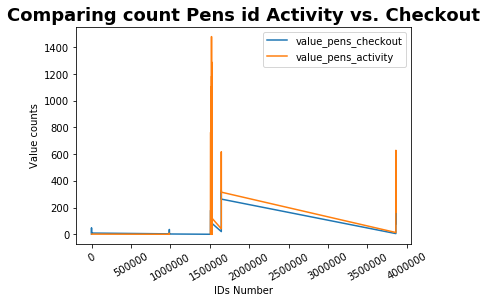

In [38]:
counts_by_ids.plot()
plt.xticks(rotation=30)
plt.xlabel('IDs Number')
plt.ylabel('Value counts')
plt.title('Comparing count Pens id Activity vs. Checkout', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.legend()
# plt.savefig('count_pens_checkout_activity.png', dpi=300)

#this might gives the relation between how many times a pen was checkout and how many times the same pen was activated

## why 2017 is less popular in checkout but more active in activity 

In [27]:
checkout_monthly_value = pensCheckouts['start'].groupby(pensCheckouts.start.dt.to_period("M")).agg('count')
checkout_monthly_value

start
2014-10       20
2014-11      154
2014-12       63
2015-01       30
2015-02      126
2015-03     8768
2015-04    14520
2015-05    12994
2015-06     9820
2015-07    12118
2015-08    11676
2015-09     9971
2015-10    12910
2015-11    14119
2015-12    14705
2016-01    13557
2016-02    15110
2016-03    11464
2016-04     8712
2016-05     3643
2016-06     7207
2016-07     7806
2016-08    14260
2016-09    14339
2016-10     9634
2016-11    10561
2016-12    13641
2017-01    12883
2017-02    11836
2017-03    10782
2017-04    14874
2017-05     4574
2017-06     5335
2017-07     8201
2017-08     8309
2017-09     7031
2017-10     4389
2017-11     4336
2017-12     6251
2018-01     9334
2018-02     6242
2018-03     5185
2018-04     5467
2018-05     7045
2018-06    11483
2018-07     9997
2018-08    11581
2018-09     9210
2018-10     7958
2018-11     8321
2018-12     7006
2019-01      447
2019-02     7293
2019-03     3404
2019-04     6654
2019-05     6255
2019-06     8468
2019-07    12042
2019-08 

In [28]:
activity_monthly_value = pensActivity['created'].groupby(pensActivity.created.dt.to_period("M")).agg('count')
activity_monthly_value

created
2014-12       52
2015-01       27
2015-02      760
2015-03    16414
2015-04    19576
2015-05    15887
2015-06    11692
2015-07    16733
2015-08    16572
2015-09    13587
2015-10    16888
2015-11    19180
2015-12    19972
2016-01    19412
2016-02    22013
2016-03    27818
2016-04    31879
2016-05    30390
2016-06    26796
2016-07    35738
2016-08    30167
2016-09    20151
2016-10    21140
2016-11    19821
2016-12    20671
2017-01    18362
2017-02    17751
2017-03    15709
2017-04    20478
2017-05    16667
2017-06    15997
2017-07    21676
2017-08    19871
2017-09    13369
2017-10    11499
2017-11    10471
2017-12    12546
2018-01    10885
2018-02     7178
2018-03     8259
2018-04     8364
2018-05     9805
2018-06     5214
2018-07    12601
2018-08    12162
2018-09     9289
2018-10    10076
2018-11     7932
2018-12     9453
2019-01      913
2019-02     8018
2019-03     8002
2019-04     6364
2019-05     7975
2019-06     8804
2019-07    12500
2019-08    11695
2019-09     8748
2019-1

In [29]:
join_monthly_value = pd.concat([checkout_monthly_value, activity_monthly_value], axis=1)
join_monthly_value = join_monthly_value.rename({'start': 'checkout_counts', 'created': 'activity_counts'}, axis=1)
join_monthly_value

,checkout_counts,activity_counts
2014-10,20.0,NaN
2014-11,154.0,NaN
2014-12,63.0,52.0
2015-01,30.0,27.0
2015-02,126.0,760.0
2015-03,8768.0,16414.0
2015-04,14520.0,19576.0
2015-05,12994.0,15887.0
2015-06,9820.0,11692.0
2015-07,12118.0,16733.0


<Figure size 576x360 with 0 Axes>

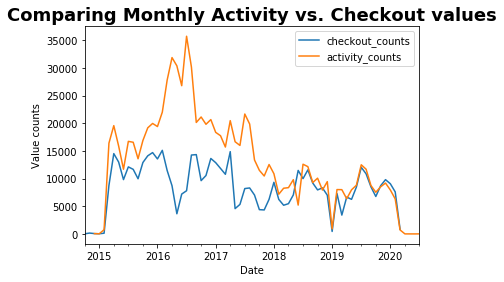

In [59]:
plt.figure(figsize=(8,5))
join_monthly_value.plot()
plt.xlabel('Date')
plt.ylabel('Value counts')
plt.title('Comparing Monthly Activity vs. Checkout values', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.legend()
# plt.savefig(Monthly_value_checkout_activity.png', dpi=300)